In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [3]:
X = load_boston().data
Y = load_boston().target
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [117]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
scaler = preprocessing.StandardScaler()
 
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

# SKLEARN LINEAR REGRESSION 

In [185]:
print(X.shape)
print(Y.shape)
clf = SGDRegressor()
clf.fit(x_train,y_train)

print(clf.predict(x_test).shape)
#mse for train data
print("MSE for train data",mean_squared_error(y_train, clf.predict(x_train)))
#mse for test data
print("MSE for test data",mean_squared_error(y_test, clf.predict(x_test)))

(506, 13)
(506,)
(152,)
MSE for train data 23.62597635901995
MSE for test data 24.42596960340608


# Custom Implementation

In [220]:
x_train = np.asmatrix(x_train)
learnrate=0.01#learningrate or stepsize,it will decrease with each iteration
max_iterations=1000
current_w=np.random.normal(size=[13,1])#initializing weights
current_w=current_w.T
current_b=np.random.normal()#initializing b
optimal_w=[]
optimal_b=[]
N=len(x_train)
print(N)
for i in range(1,max_iterations+1): 
    id=np.random.choice(len(x_train),1,replace=False)#k value is 1
    dl_dw = ((-2*(x_train[id])*((y_train[id])-(np.dot(current_w.T,x_train[id])-current_b))))
    dl_db = ((-2)*((((y_train[id])-(np.dot(current_w.T,x_train[id])-current_b)))))
    next_w = current_w - (learnrate*dl_dw)#updating the weight
    next_b = current_b - (learnrate*dl_db)#updating the b
    learnrate/=2#decreasing the learnrate for better convergence
    if (current_w-next_w).all()<0.0001:#checking wj and wj-1 are almost equal or not
        if (current_b-next_b).all()<0.0001:
                optimal_w = next_w
                optimal_b = next_b
                print('optimal w and b found after {} iterations'.format(i))
                break
        else:
                current_w = next_w
                current_b = next_b


354
optimal w and b found after 53 iterations


In [221]:
print(type(optimal_w))
print(optimal_w)#optimal_w obtained 

<class 'numpy.matrix'>
[[-0.075553    0.89432893 -0.23258404 -1.86079366  0.38897965  2.38752629
  -0.31822508  0.57381281 -0.8568589  -2.19819273  0.41979013 -0.0640618
  -0.34915259]]


MSE calucalation for both test and train data

In [222]:
#mean squared error calculation train data
totalerror=0
for i in range(0, len(x_train)):
    error = (y_train[i] - ((x_train[i])*(optimal_w.T)))**2
    totalerror += error
print('The MSE of custom implementation for train data',np.sqrt(totalerror/len(x_train)))

The MSE of custom implementation for train data [[24.27557522]]


In [223]:
#mean squared error calculation test data
totalerror=0
for i in range(0, len(x_test)):
    error = (y_test[i] - ((x_test[i])*(optimal_w.T)))**2
    totalerror += error
print('The MSE of custom implementation for test data',np.sqrt(totalerror/len(x_test)))

The MSE of custom implementation for test data [[22.36145662]]


# comparision between actual and predicted values between both models

In [224]:
x_test=np.asarray(x_test)

In [225]:
x_test.reshape(-1,1)

array([[-0.41814319],
       [-0.45257245],
       [-1.06299571],
       ...,
       [ 0.71147097],
       [ 0.38757414],
       [ 0.45231146]])

In [226]:
x_test.shape

(152, 13)

In [227]:
y_pred = []
for i in x_test:
        y_pred.append(np.dot(optimal_w, i))
y_pred=np.asarray(y_pred)

In [228]:
print(y_pred[1])
y_pred=np.squeeze(y_pred)
print(y_pred.shape)

[[-1.3018453]]
(152,)


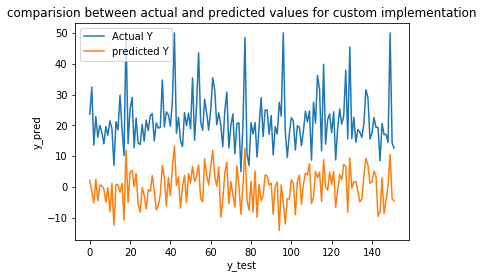

In [229]:
plt.plot(y_test,label="Actual Y")
plt.plot(y_pred,label="predicted Y")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('comparision between actual and predicted values for custom implementation')
plt.legend()
plt.show()

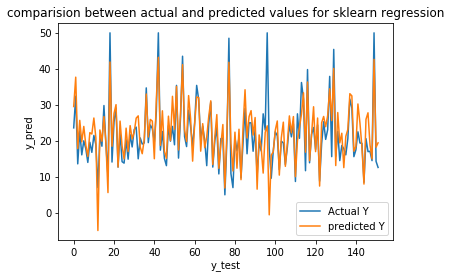

In [230]:
y_predsklearn=clf.predict(x_test)
plt.plot(y_test,label="Actual Y")
plt.plot(y_predsklearn,label="predicted Y")
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('comparision between actual and predicted values for sklearn regression')
plt.legend()
plt.show()

# Weights comparison between both models

In [231]:
 sklearn_weights=clf.coef_
a=sklearn_weights
b=optimal_w
b=np.squeeze(np.asarray(b))
print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [232]:
df = pd.DataFrame({'sklearnweights':a, 'implementationweights':b})

In [233]:
df

,sklearnweights,implementationweights
0,-0.801420,-0.075553
1,0.417249,0.894329
2,-0.259428,-0.232584
3,1.026540,-1.860794
4,-0.766631,0.388980
5,3.377660,2.387526
6,-0.314433,-0.318225
7,-1.937793,0.573813
8,0.489396,-0.856859
9,-0.285753,-2.198193


# MSE comparision between both models

In [234]:
from prettytable import PrettyTable
X=PrettyTable()
X.field_names=["Model","TRAIN","TEST"]
X.add_row(["SKLEARN","23.6259","24.4259"])
X.add_row(["CUSTOM","24.2755","22.3614"])
print(X)

+---------+---------+---------+
|  Model  |  TRAIN  |   TEST  |
+---------+---------+---------+
| SKLEARN | 23.6259 | 24.4259 |
|  CUSTOM | 24.2755 | 22.3614 |
+---------+---------+---------+


# Conclusion

1.First I split the dataset into train,test


2.After spliting the data i trained the sklearn's sgdregressor model with train data.


3.And I calculated weights using this model and MSE for both train and test data.


4.Next I implemented the SGD implementation for linear regression with k value(sample size) equal to 1.

5.Tested the implementation with test data and calculated the MSE.

6.Compared the both models using actual_values and predicted_values.

7.compared the both model's MSE